# 3. Практика и разбор задач из `LE02.ipynb`

Будет полезно знать, что рекурсию можно визуализировать с помощью [rcviz](https://github.com/carlsborg/rcviz) или же [адаптация](https://github.com/superbobry/rcviz) от автора курса.

Наглядный [разбор декораторов](https://habr.com/ru/post/141411/) на habr.

## 3.5 Числа Фибонначи

Выполнение через рекурсию `fib1(n)` очень медленное за счет того, что в разных ветках повторно вызываются рассчеты одного и того же значения.

In [1]:
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n-1) + fib1(n-2)

In [2]:
fib1(8)  # вычисляется быстро
#fib1(80)  вычисляется уже долго

21

Через глобальную переменную кэша.

In [3]:
cache = {}  # иметь глобальную переменную не самый лучший вариант
def fib2(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n-1) + fib2(n-2)
    return cache[n]

In [4]:
fib2(8), fib2(80), fib2(800)  # всё довольно быстро

(21,
 23416728348467685,
 69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725)

Иметь глобальную переменную не лучший выбор, так как любой имеет к ней доступ на изменение. Спрячем кэш в процесс выполнения функции Фибонначи.

In [5]:
from functools import lru_cache

def memo(func):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = func(n)
        return cache[n]
    return inner

@memo # ИЛИ также можно заменить эту строчку на @lru_cache(maxsize=None) 
def fib1(n):
    assert n >= 0
    return n if n <= 1 else fib1(n - 1) + fib1(n - 2)

In [6]:
fib1(80)

23416728348467685

В Python нельзя вызывать рекурсию до бесконечности.

In [7]:
try:
    fib1(8000)
except RecursionError:
    print("Рекурсия ограничена")

Рекурсия ограничена


Решение через итерации, а не через рекурсию.

In [8]:
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0+f1
    return f1

        
print(fib3(8000))

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

Можно проверить быстродействие выполнения расчета различных вариантов.

In [9]:
import time


def timed(f, *args, n_iter=100):
    acc = float("inf")  # +бесконечность, аналог верхней границы для поиска наименьшего
    for _ in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1-t0)
    return acc
    

print(timed(fib3, 800))  #±52 микросекунд

5.5583000000081206e-05


Построим график зависимостей.

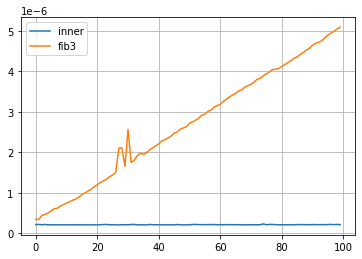

In [10]:
from matplotlib import pyplot as plt

def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
        plt.legend()
        plt.grid(True)
        
compare([fib1, fib3], list(range(100)))

Линейный рост fib3 для нас очевиден.

## 3.6 Наибольший Общий Делитель

Подготовка тестов для функций НОД.

In [11]:
import random

def test_gcd(gcd, n_iter=100):
    for i in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(b, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0        

2 итеративные версии алгоритма.

In [12]:
def gcd1(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d == 0 or a % d == b % d == 0:
            return d

In [13]:
gcd1(0, 0)

0

In [14]:
assert test_gcd(gcd1) == None  # всё ок

In [15]:
def gcd2(a, b):
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)

In [16]:
assert test_gcd(gcd2) == None  # всё ок

2 рекурсивных версии.

In [17]:
def gcd3(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return gcd3(a % b, b)
    else:
        return gcd3(a, b % a)

In [18]:
assert test_gcd(gcd3) == None  # всё ок

Одна из них называется алгоритмом Евклида.

In [19]:
def gcd4(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return gcd4(b % a, a)

In [20]:
assert test_gcd(gcd4) == None  # всё ок